# Prac 2 

Preprocessing: Import libraries

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#### Q1 a) 

Combination of numerical and categorical data. Pokemon have type (18 types) in addition to stats such as speed, weight, defense etc.

In [3]:
df = pd.read_csv('pokemonsrt.csv')
df = df.drop(df.columns[range(1,19)], axis=1)
print(df.head())


                         abilities  attack  base_egg_steps  base_happiness  \
0      ['Shield Dust', 'Run Away']      30            3840              70   
1                    ['Shed Skin']      20            3840              70   
2  ['Compoundeyes', 'Tinted Lens']      45            3840              70   
3      ['Shield Dust', 'Run Away']      35            3840              70   
4                    ['Shed Skin']      25            3840              70   

   base_total capture_rate      classfication  defense  experience_growth  \
0         195          255       Worm Pokémon       35            1000000   
1         205          120     Cocoon Pokémon       55            1000000   
2         395           45  Butterfly Pokémon       50            1000000   
3         195          255      Hairy Pokémon       30            1000000   
4         205          120     Cocoon Pokémon       50            1000000   

   height_m  ...  percentage_male pokedex_number sp_attack  sp_defen

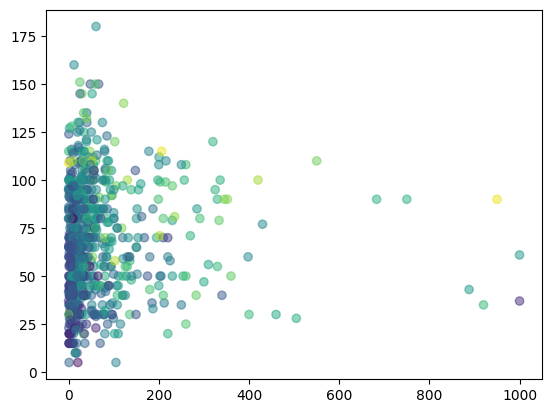

In [4]:
plt.scatter(df['weight_kg'], df['speed'], c=df['attack'], alpha=0.5)
plt.show()

Q2) Pre-process data. replace all empty Leaf area cells, and remove the rest of the records with missing data

In [12]:
df2 = pd.read_csv('seedlings.csv')
#capture original number of records
start_records = len(df2)

#find mean of Leaf area
mean_leaf = df2.loc[:, 'Leaf Area'].mean()

#replacing all NaN cells in Leaf Area with the average from that column
df2['Leaf Area'] = df2['Leaf Area'].replace(np.nan, mean_leaf, regex = True)

#drop records that are not complete
df2 = df2.dropna()

#count dropped cells:
print(f'Dropped cells: {start_records - len(df2)}')

#include the index as well:
df2 = df2.reset_index()

#create a subset of the cleaned dataset - there are too many input parameters
df3 = df2[['Height', 'Diameter', 'N_leaves', 'Leaf Area', 'DM_leaves', 'DM_stem', "Harv", 'Block']]

#print head of modified table
print(df3.head())

df4 = df3.drop('Block', axis=1)
print(df4.head())


Dropped cells: 12
   Height  Diameter  N_leaves  Leaf Area  DM_leaves  DM_stem  Harv  Block
0    49.0      6.48      13.0  581.80315        3.8      6.0     1      1
1    70.0      7.75      35.0  581.80315        5.8      7.3     1      1
2    61.0      6.67      21.0  581.80315        4.8      5.9     1      1
3    29.0      5.11      14.0  581.80315        3.5      4.6     1      1
4    32.0      4.94      14.0  581.80315        3.6      4.4     1      1
   Height  Diameter  N_leaves  Leaf Area  DM_leaves  DM_stem  Harv
0    49.0      6.48      13.0  581.80315        3.8      6.0     1
1    70.0      7.75      35.0  581.80315        5.8      7.3     1
2    61.0      6.67      21.0  581.80315        4.8      5.9     1
3    29.0      5.11      14.0  581.80315        3.5      4.6     1
4    32.0      4.94      14.0  581.80315        3.6      4.4     1


Histogram and plots of a few different features:

Mean Height: 62.03611111111111
Median Height: 60.0
Max Height: 119.0


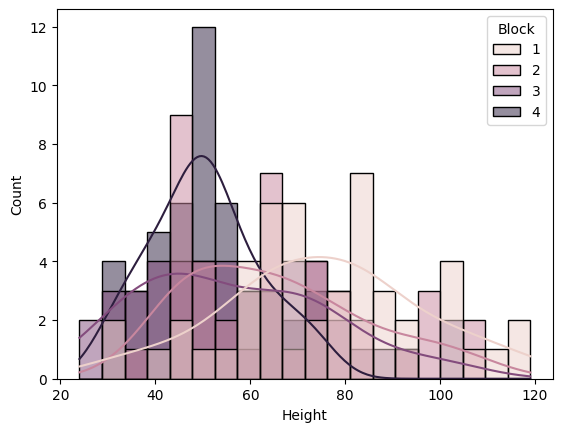

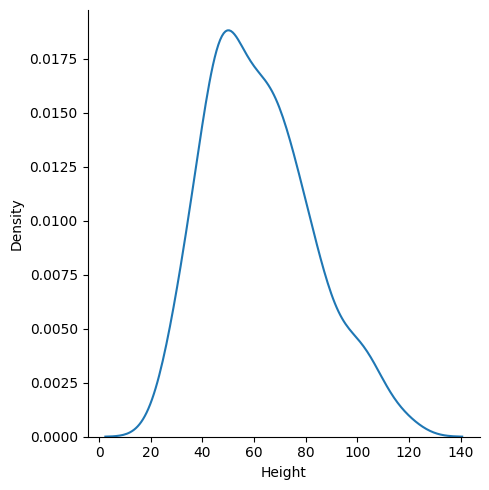

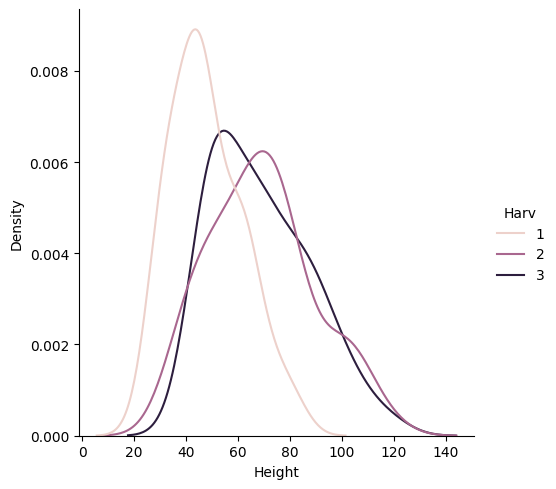

In [6]:
# sns.histplot(df3, x='Height', bins=20, kde=True, hue='Harv')

sns.histplot(df2, x='Height',  bins=20, kde=True, hue='Block')

mean_height = df3['Height'].mean()
max_height = df2['Height'].max()
med_height = df2['Height'].median()
print(f"Mean Height: {mean_height}")
print(f"Median Height: {med_height}")
print(f"Max Height: {max_height}")

sns.displot(df3, x='Height',  kind="kde")
sns.displot(df3, x='Height',  kind="kde", hue='Harv')

Q3 a) Create a draftsman display of the dataset

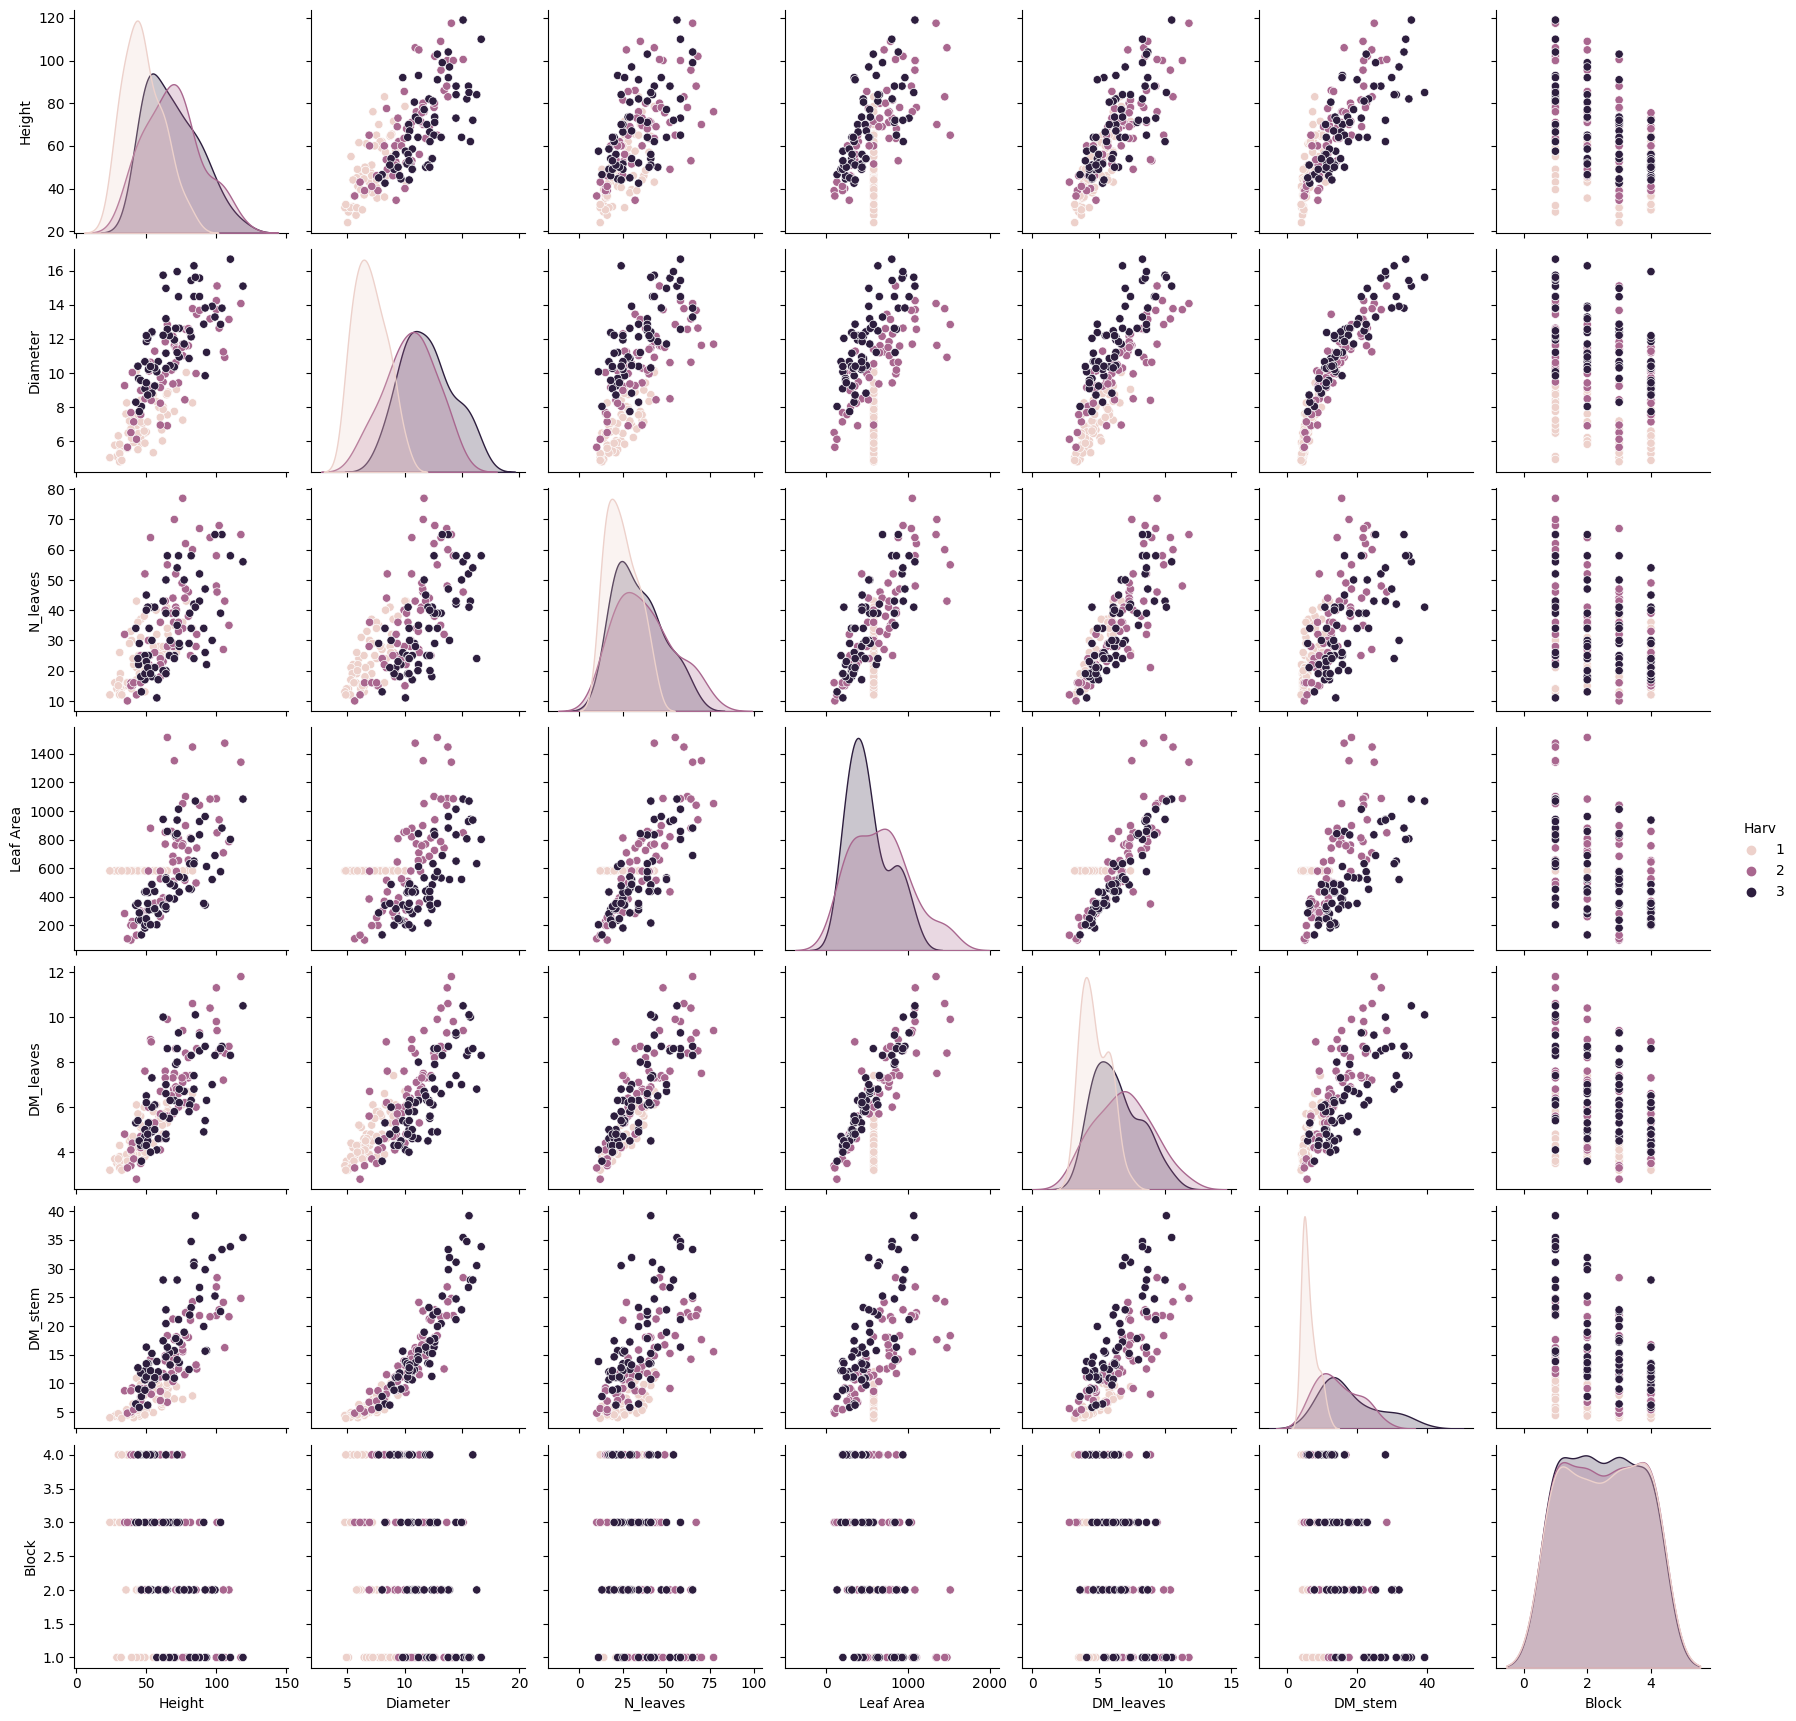

In [7]:
sns.pairplot(df3, hue="Harv")